In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import colormaps
import matplotlib as mpl

SNRs:[5 10 15 20 25 30 35]
SDR9:[83.  83.2 82.8 84.6 86.9 93.2 93.6]
SDR11:[85.1 84.6 85.9 86.6 88.5 92.9 94.2]
PA:[63.8 81.6 79.4 77.2 88.1 96.2 98.6]
species: ('5', '10', '15', '20', '25', '30', '35')
values: {'9SDRs': array([83. , 83.2, 82.8, 84.6, 86.9, 93.2, 93.6]), '11SDRs': array([85.1, 84.6, 85.9, 86.6, 88.5, 92.9, 94.2]), 'PA': array([63.8, 81.6, 79.4, 77.2, 88.1, 96.2, 98.6])}


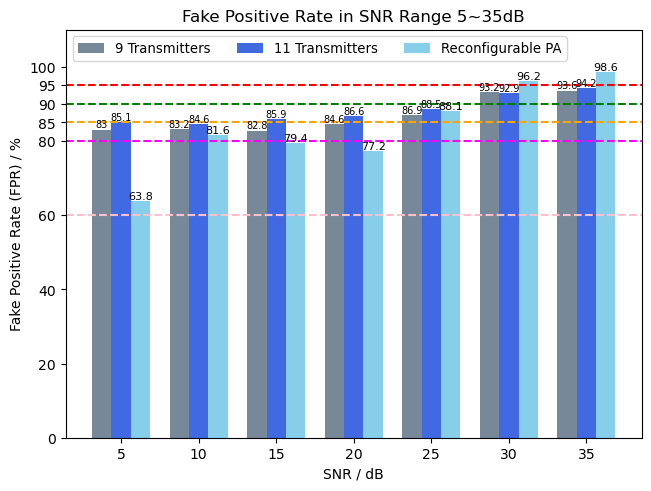

In [122]:
reader=pd.read_excel('../../writing/SDRs_PolyRay_Results_vsSNRs.xlsx')
cols=reader.keys()
SNRs=np.array(reader[cols[0]][:7])
de=3
SDR9=np.around(np.array(reader[cols[1]][:7].astype(float)), decimals=de)*100
SDR11=np.around(np.array(reader[cols[2]][:7].astype(float)), decimals=de)*100
PA=np.around(np.array(reader[cols[3]][:7].astype(float)), decimals=de)*100
print("SNRs:{}".format(SNRs))
print("SDR9:{}".format(SDR9))
print("SDR11:{}".format(SDR11))
print("PA:{}".format(PA))

species = ()
for snr in SNRs:
    species= species + (str(snr),)
print("species: {}".format(species))
values= {
    '9SDRs': SDR9,
    '11SDRs': SDR11,
    'PA': PA,
}
print("values: {}".format(values))
x = np.arange(len(species))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')


color=['lightslategray', 'royalblue',  'skyblue']

# for attribute, measurement in values.items():
#     print(attribute, measurement)
#     offset = width * multiplier
#     rects = ax.bar(x + offset, measurement, width, label=values.keys[0], color=color)
#     ax.bar_label(rects, padding=0, fontsize=7)
#     multiplier += 1

offset = width * multiplier
rects = ax.bar(x + offset, values['9SDRs'], width, label='9 Transmitters', color=color[0])
ax.bar_label(rects, padding=0, fontsize=7)
multiplier += 1

offset = width * multiplier
rects = ax.bar(x + offset, values['11SDRs'], width, label='11 Transmitters', color=color[1])
ax.bar_label(rects, padding=0, fontsize=7)
multiplier += 1

offset = width * multiplier
rects = ax.bar(x + offset, values['PA'], width, label='Reconfigurable PA', color=color[2])
ax.bar_label(rects, padding=0, fontsize=8)
multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Fake Positive Rate (FPR) / %')
ax.set_xlabel('SNR / dB')
ax.set_title('Fake Positive Rate in SNR Range 5~35dB')
ax.set_xticks(x + width, species)
ax.legend(loc='upper left', ncols=3, fontsize=9.5)
ax.set_ylim(0, 110)
ax.set_yticks([0,20,40,60,80,85, 90, 95, 100])
ax.axhline(y=95,linestyle="--", color='r')
ax.axhline(y=90,linestyle="--", color='g')
ax.axhline(y=85,linestyle="--", color='orange')
ax.axhline(y=80,linestyle="--", color='fuchsia')
ax.axhline(y=60,linestyle="--", color='pink')
plt.savefig("../../writing/figure/FPRvsSNR.pdf", format="pdf", bbox_inches="tight")
plt.show()

conv:[ 0. 35. 31. 36. 24.  0.  4.  0.  0.  0.  0.]
poly:[75.  87.5 90.2 88.3 62.5 50.  62.5 76.2 94.5 75.  87.5]
poly_ray:[ 96.9 100.   88.3  94.5  92.2  93.   90.6  93.   93.8  97.7  96.9]
species: ('0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10')


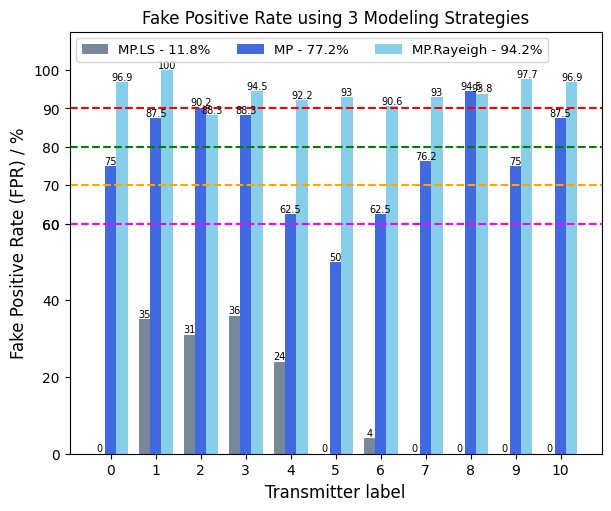

In [16]:
reader=pd.read_excel('../../ICCwriting/SDRs_Conv_Poly_PolyRay_Results_SNR35.xlsx')
cols=reader.keys()
rows=11
de=3
labels=np.array(reader[cols[0]][:rows])
conv=np.around(np.array(reader[cols[1]][:rows].astype(float)), decimals=de)*100
poly=np.around(np.array(reader[cols[2]][:rows].astype(float)), decimals=de)*100
poly_ray=np.around(np.array(reader[cols[3]][:rows].astype(float)), decimals=de)*100
print("conv:{}".format(conv))
print("poly:{}".format(poly))
print("poly_ray:{}".format(poly_ray))
# print("PA:{}".format(PA))

species = ()
for label in labels:
    species= species + (str(label),)
print("species: {}".format(species))

x = np.arange(len(species))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained', figsize=(6, 5))


color=['lightslategray', 'royalblue',  'skyblue']

offset = width * multiplier
rects = ax.bar(x + offset, conv, width, label='MP.LS - 11.8%', color=color[0])
ax.bar_label(rects, padding=0, fontsize=7)
multiplier += 1

offset = width * multiplier
rects = ax.bar(x + offset, poly, width, label='MP - 77.2%', color=color[1])
ax.bar_label(rects, padding=0, fontsize=7)
multiplier += 1

offset = width * multiplier
rects = ax.bar(x + offset, poly_ray, width, label='MP.Rayeigh - 94.2%', color=color[2])
ax.bar_label(rects, padding=0, fontsize=7)
multiplier += 1


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Fake Positive Rate (FPR) / %',fontsize=12)
ax.set_xlabel('Transmitter label',fontsize=12)
ax.set_title('Fake Positive Rate using 3 Modeling Strategies')
ax.set_xticks(x + width, species)
ax.set_yticks([0,20,40,60,70,80,90,60,100])
ax.legend(loc='upper left', ncols=3, fontsize=9.5)
ax.set_ylim(0, 110)
ax.axhline(y=90,linestyle="--", color='r')
ax.axhline(y=80,linestyle="--", color='g')
ax.axhline(y=70,linestyle="--", color='orange')
ax.axhline(y=60,linestyle="--", color='fuchsia')
# plt.savefig("../../writing/figure/FPRvs3Modeling.pdf", format="pdf", bbox_inches="tight")
plt.savefig("./checkpoint2/results/figure/FPRvs3Modeling.svg", bbox_inches="tight")
plt.show()


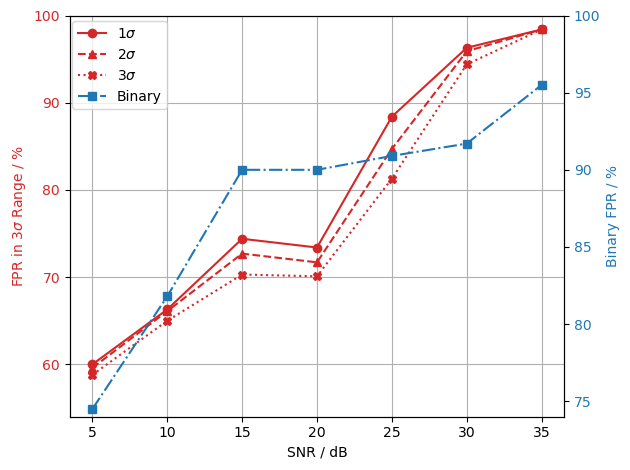

In [45]:
reader = pd.read_excel("../../writing/PAresult_2sigma_binary.xlsx")

cols = reader.keys()[1:]
rows = reader.values[:,1:]
rows=np.around(np.array(rows.astype(float)), decimals=3)*100
fig, ax1 = plt.subplots()

color = 'tab:red'
marker = ['o', '^', 'X']
line=['-', '--', ':']
ax1.set_xlabel('SNR / dB')
ax1.set_ylabel('FPR in 3'+r'$\sigma$ '+"Range / %", color=color)
for i in range(3):
    ax1.plot(cols, rows[i], color=color, marker=marker[i], linestyle=line[i], label=str(i+1)+r'$\sigma$')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylim([54,100])
ax1.grid()

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('Binary FPR / %', color=color)  # we already handled the x-label with ax1
ax2.plot(cols, rows[-1], color=color, marker='s', linestyle='-.', label='Binary')
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim([74,100])

fig.legend(bbox_to_anchor=(0.28, 0.96))
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig("../../writing/figure/PA_3sigma_binary.pdf", format="pdf", bbox_inches="tight")
plt.show()

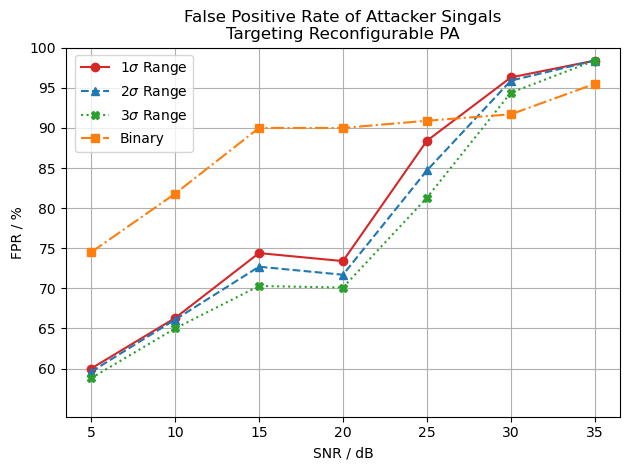

In [66]:
reader = pd.read_excel("../../writing/PAresult_2sigma_binary.xlsx")

cols = reader.keys()[1:]
rows = reader.values[:,1:]
rows=np.around(np.array(rows.astype(float)), decimals=3)*100
fig, ax1 = plt.subplots()

color = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange']
marker = ['o', '^', 'X']
line=['-', '--', ':']
ax1.set_xlabel('SNR / dB')
ax1.set_ylabel("FPR / %")
for i in range(3):
    ax1.plot(cols, rows[i], color=color[i], marker=marker[i], linestyle=line[i], label=str(i+1)+r'$\sigma$ Range')
ax1.plot(cols, rows[-1], color=color[-1], marker='s', linestyle='-.', label='Binary')
ax1.tick_params(axis='y')
ax1.set_ylim([54,100])
ax1.grid()
ax1.set_yticks([60,65,70,75,80,85,90,95,100])
ax1.set_title("False Positive Rate of Attacker Singals\nTargeting Reconfigurable PA")
fig.legend(bbox_to_anchor=(0.32, 0.89))
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig("../../writing/figure/PA_3sigma_binary.pdf", format="pdf", bbox_inches="tight")
plt.show()

[[ 60.   66.3  74.4  73.4  88.4  96.3  98.4]
 [ 59.6  66.1  72.7  71.7  84.7  95.9  98.4]
 [ 58.8  65.   70.3  70.1  81.3  94.4  98.4]
 [ 74.5  81.8  90.   90.   90.9  91.7  95.5]
 [ 71.1  96.1 100.  100.  100.  100.  100. ]]


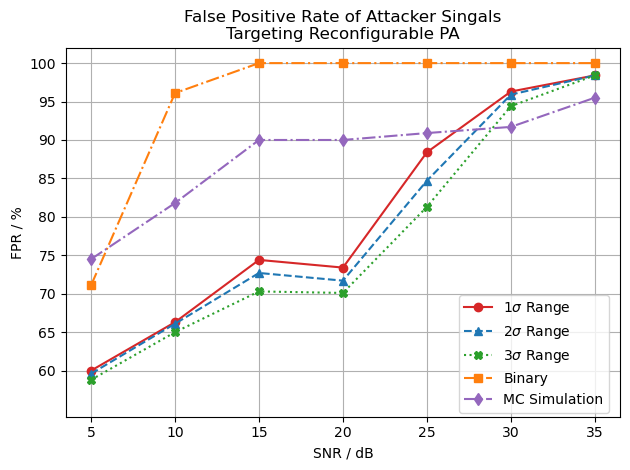

In [132]:
reader = pd.read_excel("../../writing/PAresult_2sigma_binary.xlsx")

cols = reader.keys()[1:]
rows = reader.values[:,1:]
rows=np.around(np.array(rows.astype(float)), decimals=3)*100
fig, ax1 = plt.subplots()
print(rows)
color = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange', 'tab:purple']
marker = ['o', '^', 'X']
line=['-', '--', ':']
ax1.set_xlabel('SNR / dB')
ax1.set_ylabel("FPR / %")
for i in range(3):
    ax1.plot(cols, rows[i], color=color[i], marker=marker[i], linestyle=line[i], label=str(i+1)+r'$\sigma$ Range')
ax1.plot(cols, rows[-1], color=color[-2], marker='s', linestyle='-.', label='Binary')
ax1.plot(cols, rows[-2], color=color[-1], marker='d', linestyle='-.', label='MC Simulation')
ax1.tick_params(axis='y')
ax1.set_ylim([54,102])
ax1.grid()
ax1.set_yticks([60,65,70,75,80,85,90,95,100])
ax1.set_title("False Positive Rate of Attacker Singals\nTargeting Reconfigurable PA")
fig.legend(bbox_to_anchor=(0.97, 0.39))
fig.tight_layout()  # otherwise the right y-label is slightly clipped
# plt.savefig("../../writing/figure/PA_3sigma_binary_MC.pdf", format="pdf", bbox_inches="tight")
plt.show()

SNRs:[ 5 10 15 20 25 30 35]
SDR9:[83.  83.2 82.8 84.6 86.9 93.2 93.6]
SDR11:[85.1 84.6 85.9 86.6 88.5 92.9 94.2]
Bi:[83.4 88.9 89.7 89.2 88.9 90.3 95.6]
SDR11-9:[ 2.1  1.4  3.1  2.   1.6 -0.3  0.6]
bi-11:[-1.7  4.3  3.8  2.6  0.4 -2.6  1.4]


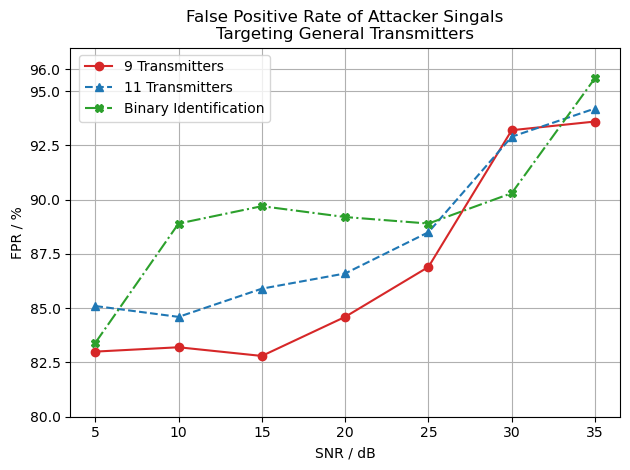

In [130]:
reader=pd.read_excel('../../writing/9SDR_11SDR.xlsx')
cols=reader.keys()
SNRs=np.array(reader[cols[0]][:7])
de=3
SDR9=np.around(np.array(reader[cols[1]][:7].astype(float)), decimals=de)*100
SDR11=np.around(np.array(reader[cols[2]][:7].astype(float)), decimals=de)*100
bi=np.around(np.array(reader[cols[3]][:7].astype(float)), decimals=de)*100
print("SNRs:{}".format(SNRs))
print("SDR9:{}".format(SDR9))
print("SDR11:{}".format(SDR11))
print("Bi:{}".format(bi))
print("SDR11-9:{}".format(SDR11-SDR9))
print("bi-11:{}".format(bi-SDR11))
fig, ax1 = plt.subplots()

color = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange']
marker = ['o', '^', 'X']
line=['-', '--', '-.']

ax1.set_xlabel('SNR / dB')
ax1.set_ylabel("FPR / %")
ax1.plot(SNRs, SDR9, color=color[0], marker=marker[0], linestyle=line[0], label='9 Transmitters')
ax1.plot(SNRs, SDR11, color=color[1], marker=marker[1], linestyle=line[1], label='11 Transmitters')
ax1.plot(SNRs, bi, color=color[2], marker=marker[2], linestyle=line[2], label='Binary Identification')

ax1.set_ylim([80,97])
ax1.grid()
ax1.set_yticks([80,82.5,85,87.5,90,92.5,95,96])
ax1.set_title("False Positive Rate of Attacker Singals\nTargeting General Transmitters")
fig.legend(bbox_to_anchor=(0.44, 0.89))
fig.tight_layout()  # otherwise the right y-label is slightly clipped
# plt.savefig("../../writing/figure/SDR_9_11_bi.pdf", format="pdf", bbox_inches="tight")
plt.show()

SNRs:[ 5 10 15 20 25 30 35]
no attacker:[20.2 30.6 41.2 45.5 49.4 55.8 62. ]
attacker:[79.1 78.3 74.5 77.6 81.2 81.8 88.6]


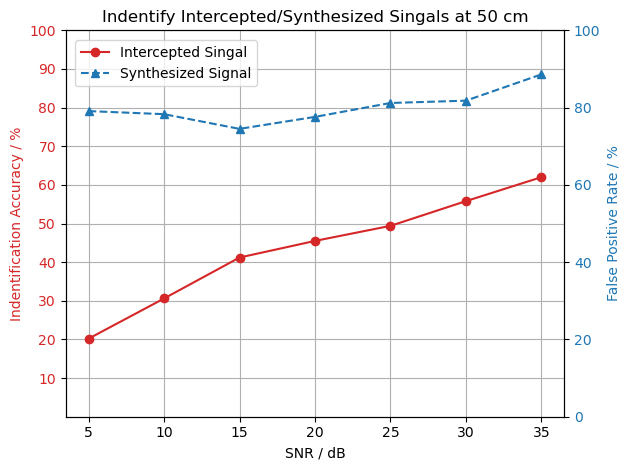

In [114]:
reader=pd.read_excel('../../writing/SDR50cm.xlsx')
cols=reader.keys()
SNRs=np.array(reader[cols[0]][:7])
de=3
noatt=np.around(np.array(reader[cols[1]][:7].astype(float)), decimals=de)*100
att=np.around(np.array(reader[cols[2]][:7].astype(float)), decimals=de)*100
print("SNRs:{}".format(SNRs))
print("no attacker:{}".format(noatt))
print("attacker:{}".format(att))

fig, ax1 = plt.subplots()

color = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange']
marker = ['o', '^', 'X']
line=['-', '--', '-.']

ax1.set_xlabel('SNR / dB')
ax1.set_ylabel("FPR / %")
ax1.plot(SNRs, noatt, color=color[0], marker=marker[0], linestyle=line[0], label='Intercepted Singal')

ax1.set_ylabel('Indentification Accuracy / %', color=color[0]) 
ax1.set_ylim([0,100])
ax1.grid()
ax1.set_yticks([10,20,30,40,50,60,70,80,90,100])
ax1.tick_params(axis='y', labelcolor=color[0])
ax1.set_title("Indentify Intercepted/Synthesized Singals at 50 cm")

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('False Positive Rate / %', color=color[1]) 
ax2.plot(SNRs, att, color=color[1], marker=marker[1], linestyle=line[1], label='Synthesized Signal')
ax2.tick_params(axis='y', labelcolor=color[1])
ax2.set_ylim([0,100])


fig.legend(bbox_to_anchor=(0.42, 0.92))
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig("../../writing/figure/SDR_50cm.pdf", format="pdf", bbox_inches="tight")
plt.show()